In [1]:
import pandas as pd
import numpy as np
from scipy.stats import zscore
import matplotlib.pyplot as plt
import seaborn as sns




In [2]:
# Load the data from a CSV file
#data = pd.read_csv('aksansh.csv')
data = pd.read_csv('Data Sheet Revised_CSV.csv')
# Assuming the target variable is named 'target' and the input features are in columns 'feature1', 'feature2', etc.

# Extract the target variable and input features
y = data['Max Melt Pool Width']
X = data.drop('Max Melt Pool Width', axis=1)



In [3]:
data.head()

,Power,Scanning Speed,Layer Thickness,Spot Size,Porosity,Max Melt Pool Width,Max Melt Pool Depth
0,50,200,30,100,40.5,112.5,40.0
1,50,400,30,100,40.5,75.0,25.0
2,50,600,30,100,40.5,75.0,25.0
3,50,800,30,100,40.5,75.0,5.0
4,50,1000,30,100,40.5,75.0,5.0


In [4]:
y.head()

0    112.5
1     75.0
2     75.0
3     75.0
4     75.0
Name: Max Melt Pool Width, dtype: float64

In [5]:
X.head()

,Power,Scanning Speed,Layer Thickness,Spot Size,Porosity,Max Melt Pool Depth
0,50,200,30,100,40.5,40.0
1,50,400,30,100,40.5,25.0
2,50,600,30,100,40.5,25.0
3,50,800,30,100,40.5,5.0
4,50,1000,30,100,40.5,5.0


In [6]:
X = X.rename(columns={'Power': 'x1', 'Scanning Speed': 'x2', 'Layer Thickness': 'x3', 'Spot Size': 'x4','Porosity': 'x5'})

In [7]:
X.head()

,x1,x2,x3,x4,x5,Max Melt Pool Depth
0,50,200,30,100,40.5,40.0
1,50,400,30,100,40.5,25.0
2,50,600,30,100,40.5,25.0
3,50,800,30,100,40.5,5.0
4,50,1000,30,100,40.5,5.0


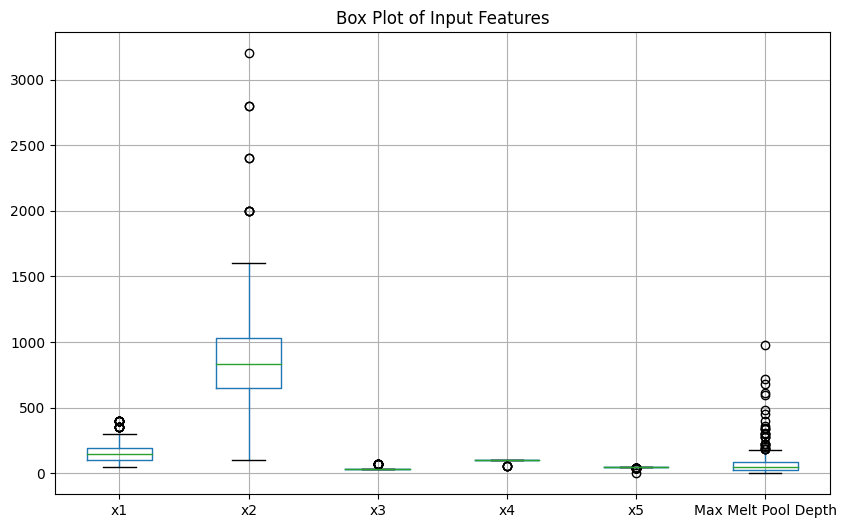

In [8]:
# Create a box plot for each feature
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
X.boxplot()

# Add a title to the plot
plt.title('Box Plot of Input Features')

# Show the plot
plt.show()




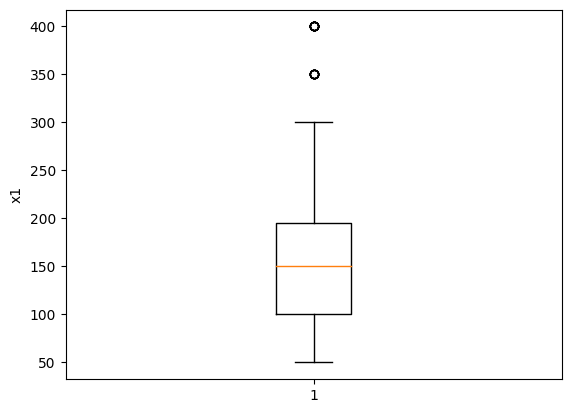

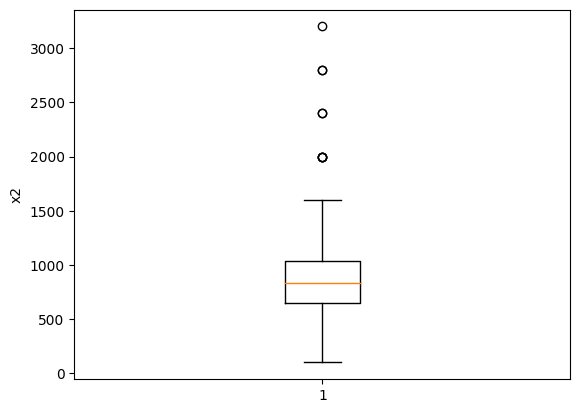

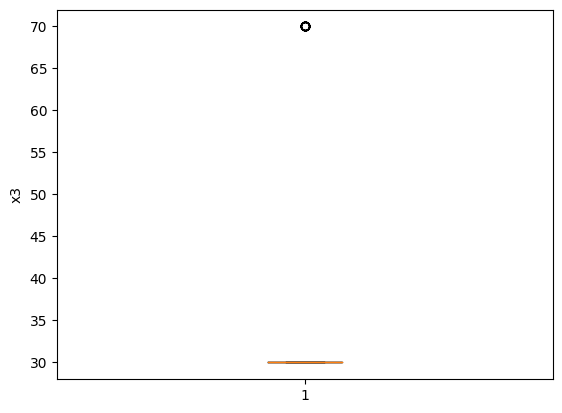

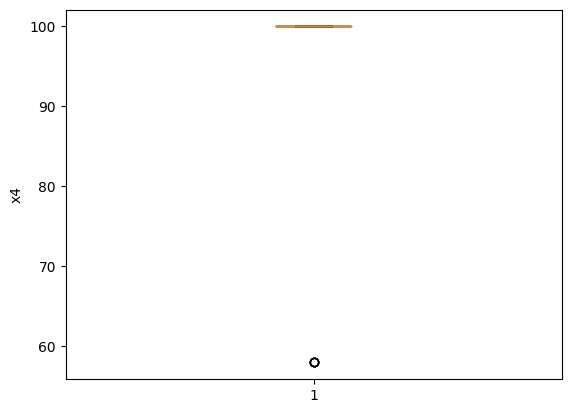

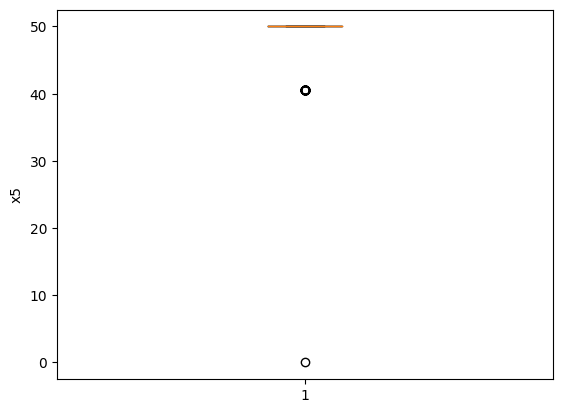

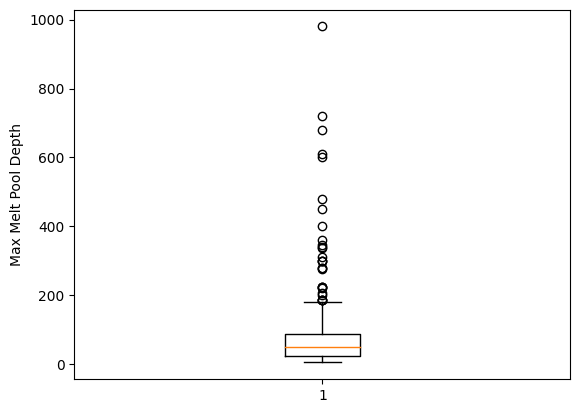

<Figure size 640x480 with 0 Axes>

In [9]:
# Find outlier indices for each feature
outlier_indices = []
outlier_values = []
k=1
for feature in X.columns:
    # Get the values for the current feature
    feature_values = X[feature].values

    # Create a box plot for the current feature
    plt.boxplot(feature_values)
    #plt.xlabel('X-axis Title')
    plt.ylabel(feature)
    plt.savefig(f'boxplot_{k}.png')
    k=k+1
    plt.show()
    # Find the outliers
    outliers = plt.boxplot(feature_values)['fliers'][0].get_data()[1]
    #print(outliers)
    # Append the outlier indices to the list
    outlier_indices.append([i for i, val in enumerate(feature_values) if val in outliers])
    outlier_values.append(outliers)

    # Clear the current plot
    plt.clf()

In [10]:
# Print the outlier indices for each feature
for i, feature in enumerate(X.columns):
    print(f"Outliers for {feature}: {outlier_indices[i]} [{i}] {outlier_values[i]} ")

Outliers for x1: [632, 633, 634, 635, 636, 637, 638, 639, 640, 641, 642, 643, 644, 645, 646, 647, 658, 659, 660] [0] [350 350 350 350 350 350 350 350 400 400 400 400 400 400 400 400 400 400
 400] 
Outliers for x2: [624, 630, 631, 637, 638, 639, 645, 646, 647] [1] [2000 2000 2400 2000 2400 2800 2000 2800 3200] 
Outliers for x3: [648, 649, 650, 651, 652, 653, 654, 655, 656, 657, 658, 659, 660, 661, 662, 663, 664, 665] [2] [70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70] 
Outliers for x4: [661, 662, 663, 664, 665] [3] [58 58 58 58 58] 
Outliers for x5: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 665] [4] [40.5 40.5 40.5 40.5 40.5 40.5 40.5 40.5 40.5 40.5 40.5 40.5 40.5 40.5
 40.5 40.5 40.5 40.5 40.5 40.5 40.5 40.5 40.5 40.5 40.5 40.5 40.5 40.5
 40.5 40.5 40.5 40.5 40.5 40.5 40.5 40.5 40.5 40.5 40.5 40.5 40.5 40.5
  0. ] 
Outliers for Max Melt Pool Depth: [6, 12, 24, 25

In [11]:
X.shape

(666, 6)

In [12]:
data.shape

(666, 7)

In [13]:

X_new = X.drop(outlier_indices[1])
print(X_new.head())
print(X_new.shape)

   x1    x2  x3   x4    x5  Max Melt Pool Depth
0  50   200  30  100  40.5                 40.0
1  50   400  30  100  40.5                 25.0
2  50   600  30  100  40.5                 25.0
3  50   800  30  100  40.5                  5.0
4  50  1000  30  100  40.5                  5.0
(657, 6)


In [14]:
data_new = data.drop(outlier_indices[1])
data_new.head()


,Power,Scanning Speed,Layer Thickness,Spot Size,Porosity,Max Melt Pool Width,Max Melt Pool Depth
0,50,200,30,100,40.5,112.5,40.0
1,50,400,30,100,40.5,75.0,25.0
2,50,600,30,100,40.5,75.0,25.0
3,50,800,30,100,40.5,75.0,5.0
4,50,1000,30,100,40.5,75.0,5.0


In [15]:
print(data_new.shape)

(657, 7)


In [16]:
# Save the DataFrame to a CSV file
data_new.to_csv('filtered_dataset_no_outlier.csv', index=False)

In [17]:
# Calculate the Z-scores for each feature
z_scores = zscore(X)

print(z_scores)

           x1        x2        x3         x4         x5  Max Melt Pool Depth
0   -1.201214 -2.084538 -0.166667   0.086973  -2.943466            -0.347359
1   -1.201214 -1.442771 -0.166667   0.086973  -2.943466            -0.525776
2   -1.201214 -0.801004 -0.166667   0.086973  -2.943466            -0.525776
3   -1.201214 -0.159237 -0.166667   0.086973  -2.943466            -0.763665
4   -1.201214  0.482530 -0.166667   0.086973  -2.943466            -0.763665
..        ...       ...       ...        ...        ...                  ...
661  0.900311 -2.405422  6.000000 -11.497826   0.224841             2.864143
662  0.900311 -1.763655  6.000000 -11.497826   0.224841             1.555753
663  0.900311 -0.319679  6.000000 -11.497826   0.224841             0.128419
664  0.900311  0.482530  6.000000 -11.497826   0.224841            -0.466304
665  0.900311 -2.405422  6.000000 -11.497826 -16.450458             3.280449

[666 rows x 6 columns]


In [18]:
# Define a threshold for outlier detection (e.g., Z-score > 3)
threshold = 3

# Find outliers based on the Z-scores
outlier_indices = np.where(np.abs(z_scores) > threshold)[0]

# Print the indices of outliers
print("Outlier indices:", outlier_indices)

Outlier indices: [ 30  36 611 615 620 624 625 630 631 632 632 633 633 634 635 636 637 637
 638 638 639 639 640 640 641 641 642 643 644 645 645 646 646 647 647 648
 649 650 651 652 653 654 655 656 657 658 658 658 659 659 660 660 661 661
 662 662 663 663 664 664 665 665 665 665]
